# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 602


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [20]:
# Set the API base URL
url = 'http://api.openweathermap.org/data/2.5/weather'
units = 'metric'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + '?appid=' + weather_api_key + '&units=' + units + '&q=' + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mukah
City not found. Skipping...
Processing Record 2 of Set 1 | dwarka
Processing Record 3 of Set 1 | bilibino
Processing Record 4 of Set 1 | inebolu
Processing Record 5 of Set 1 | college
Processing Record 6 of Set 1 | quang ngai
Processing Record 7 of Set 1 | taos
Processing Record 8 of Set 1 | al kharijah
Processing Record 9 of Set 1 | edinburgh of the seven seas
Processing Record 10 of Set 1 | popondetta
Processing Record 11 of Set 1 | qaqortoq
Processing Record 12 of Set 1 | porbandar
Processing Record 13 of Set 1 | ushuaia
Processing Record 14 of Set 1 | malango
Processing Record 15 of Set 1 | kintampo
Processing Record 16 of Set 1 | huarmey
Processing Record 17 of Set 1 | vilyuchinsk
Processing Record 18 of Set 1 | new plymouth
Processing Record 19 of Set 1 | bredasdorp
Processing Record 20 of Set 1 | les sables-d'olonne
Processing Record 21 of Set 1 | bodo
Processing Record 22 of Set 1 |

In [21]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          576
Lat           576
Lng           576
Max Temp      576
Humidity      576
Cloudiness    576
Wind Speed    576
Country       576
Date          576
dtype: int64

In [22]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,dwarka,22.2394,68.9678,26.50,72,0,4.01,IN,1698366631
1,bilibino,68.0546,166.4372,-16.47,97,83,1.05,RU,1698366631
2,inebolu,41.9747,33.7608,20.07,65,100,2.37,TR,1698366631
3,college,64.8569,-147.8028,2.67,74,75,0.00,US,1698366632
4,quang ngai,15.1167,108.8000,26.65,84,47,1.15,VN,1698366632


In [23]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [24]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,dwarka,22.2394,68.9678,26.50,72,0,4.01,IN,1698366631
1,bilibino,68.0546,166.4372,-16.47,97,83,1.05,RU,1698366631
2,inebolu,41.9747,33.7608,20.07,65,100,2.37,TR,1698366631
3,college,64.8569,-147.8028,2.67,74,75,0.00,US,1698366632
4,quang ngai,15.1167,108.8000,26.65,84,47,1.15,VN,1698366632


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

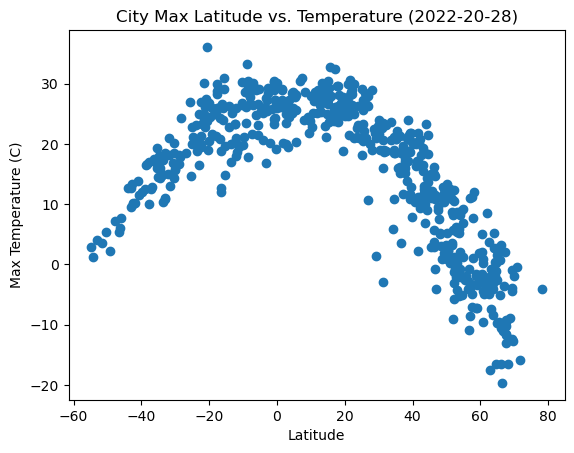

In [25]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'])

# Incorporate the other graph properties
plt.title('City Max Latitude vs. Temperature (2022-20-28)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

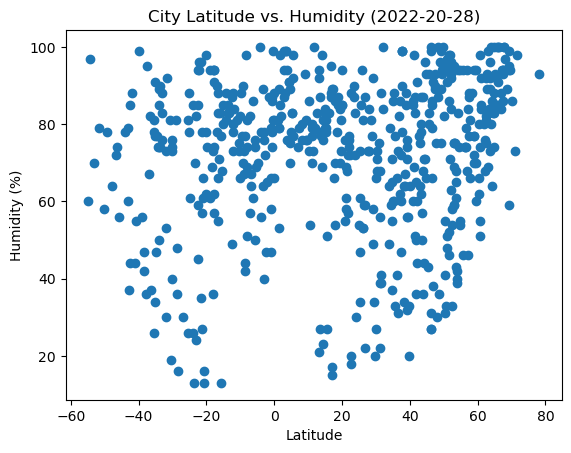

In [26]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'])

# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity (2022-20-28)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

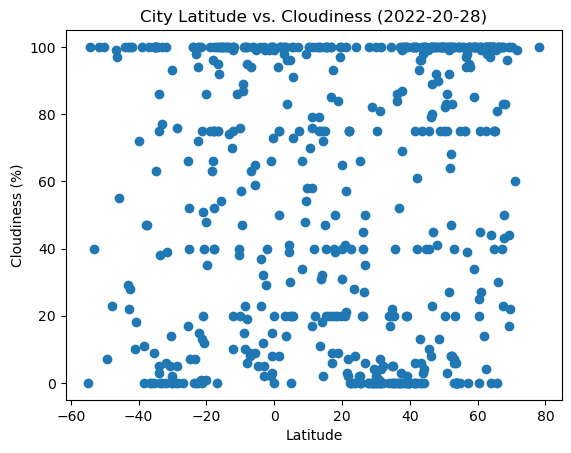

In [27]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'])

# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness (2022-20-28)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

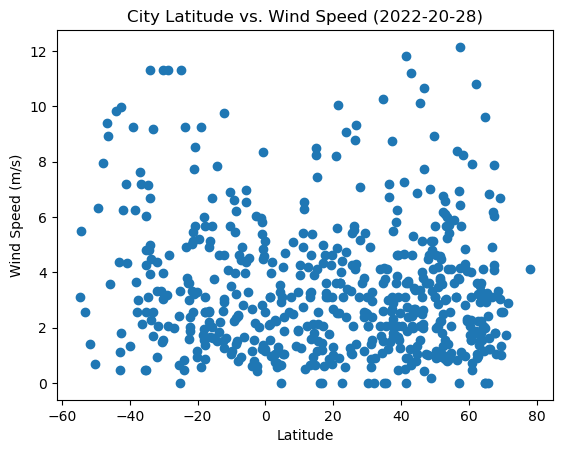

In [28]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'])

# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed (2022-20-28)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [29]:
# Define a function to create Linear Regression plots
def plot_line_reg(hemisphere_df, Y):
    x = hemisphere_df['Lat']
    y = hemisphere_df['Y']

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    y_line_reg = slope * x + intercept
    print(f'The r-value is: {rvalue:.4f}')

    fig, axes = plt.subplots()
    plt.scatter(x, y)
    plt.plot(x, y_line_reg, color = 'red')
    plt.xlabel('Latitude')
    plt.ylabel(Y)
    print(f'The r-value is: {rvalue}')
    plt.show()

In [30]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df['Lat'])] >=0

# Display sample data
northern_hemi_df.head()

KeyError: '[22.2394, 68.0546, 41.9747, 64.8569, 15.1167, 36.4072, 25.4514, -37.0676, -8.7537, 60.7167, 21.6422, -54.8, -2.9627, 8.0563, -10.0681, 52.9306, -39.0667, -34.5322, 46.6667, 67.28, 38.5167, 78.2186, 51.5333, 48.0056, -0.9, 46.4333, 42.9744, -37.6167, 39.1763, -8.5421, 64.75, 44.0306, -0.7393, -25.066, 25.7895, 62.456, -54.2811, 71.6872, 20.9219, -16.7333, -2.8856, 41.3712, 4.6628, 22.0669, 11.0333, -49.35, -43.9535, -0.8833, 49.3145, 19.5933, -9.3852, 69.4865, -12.1568, 42.097, 42.6001, -34.0033, 21.9789, 63.6445, 59.6361, -16.2325, -15.1961, -35.2268, 5.1552, -30.2406, 64.8, 65.5333, 55.7435, -9.7667, 25.4297, 41.7597, 29.25, -34.4187, 69.2167, -34.0527, -33.0393, -46.4, -8.145, 53.75, -7.9139, -43.0167, 63.7506, 25.5198, 66.0833, 39.1834, 67.5833, 68.7098, 46.3168, 35.139, 48.4001, -19.6833, 47.4334, 50.8552, 47.5649, 34.6714, 23.9011, -51.7236, -21.2078, 36.2149, 52.3333, 66.4167, 69.2551, -4.0167, 63.7415, -41.8697, 60.8953, -8.7676, 48.7567, 38.421, 67.6713, 1.4866, 27.5219, 17.4103, 64.5667, -22.4325, 41.5286, 67.4667, 59.5667, -8.4192, -50.3408, 43.3236, 47.8667, 43.9036, 26.7158, 49.6303, 51.3813, 60.7253, 11.2278, 62.5353, 39.4562, 36.6177, 25.2333, 5.4112, -33.0117, 2.7739, 59.5833, 13.1, -2.0, -3.3, -17.75, -6.9811, 37.7167, 50.1544, 22.6783, -20.2208, -35.1114, -21.6403, -26.9566, 29.1614, 62.0511, -35.4323, -37.8333, 54.868, 14.9167, -33.918, 65.2653, 67.5, -5.6333, 49.2942, 63.7553, 48.2398, 41.591, -20.7333, -8.5186, 62.59, 43.5407, 70.9221, 3.6746, -25.0319, -33.5906, 50.9333, -46.5619, 31.3525, 62.7084, 60.3736, 30.9522, 14.0453, 51.8333, 31.3974, 57.79, -0.0583, 32.2163, 61.0296, -2.5364, -9.0122, 64.5401, 25.0213, 53.3168, 54.7804, 60.7161, 14.8667, -16.4497, 17.0151, -13.6339, 24.2049, 20.0458, -31.9135, 5.6167, 46.3497, -12.3481, -18.1416, 37.0667, 22.0752, -33.95, 11.1635, 53.0452, 23.6848, -21.1333, 17.6167, 29.9576, 11.3474, -53.15, 14.35, -47.7503, 63.9331, 36.1683, 11.7, 45.4878, -19.0372, 12.65, 49.4169, 42.153, -15.5333, 18.4167, 30.3392, -38.5473, -0.7167, 31.4451, 6.9248, -19.0595, 28.017, 45.5234, 64.0049, 37.5027, -33.6971, -32.035, 8.1499, 16.0678, -17.8786, 64.2273, -7.9855, 62.7833, 33.7456, 37.3138, 17.9583, -12.2787, 34.5043, 33.7333, 13.5361, 4.375, 15.1333, 19.9333, 53.9166, 44.2999, 53.9667, 53.0838, 44.4657, 31.1667, 44.1833, -17.7833, 31.5125, 52.5243, 29.5, 50.2581, -12.1629, 1.6381, -21.0595, 39.6647, -0.6, 19.311, -42.4667, -1.4014, -0.6136, 53.1525, 64.9225, 12.15, 69.4058, -12.1667, 60.5544, -17.8, 23.7667, -30.6335, -11.0925, -30.1811, 43.1041, 61.8099, 7.4515, -40.9597, 35.1333, 17.997, -15.2119, -40.8135, 41.0856, -15.8631, -11.7358, 18.8003, -42.6128, 67.6803, 66.8014, -22.2833, 36.7248, -22.9575, -30.2583, -13.7, 63.4106, 3.8653, 26.3369, -15.8025, -28.4478, -6.2842, 21.2141, 32.0724, 63.0128, 10.1657, -33.0153, 66.0755, 1.3673, 51.0736, -4.8278, 27.9769, 15.1355, -36.4161, -42.7826, 16.7833, 19.6228, 39.2342, 54.0936, -3.1333, 44.6389, -2.5744, -24.8667, -22.4, 26.0734, 56.2499, -21.4333, 47.5166, 51.0333, 48.9167, 38.3118, 40.8333, 34.85, -0.3582, 34.6391, -38.2667, 62.1406, 70.0744, 4.6374, 22.785, 46.3722, 20.8667, -12.0667, -17.7338, 58.8353, 65.7461, 14.0289, 55.6078, 26.5412, 58.8454, 53.0754, 50.5667, 57.509, 54.4502, 44.6213, 4.9167, 30.246, 39.1589, 43.7986, -35.3378, 9.51, -23.1333, 52.9463, -20.05, 16.8167, 9.0622, 13.8584, 56.801, 43.2128, -0.2167, 30.1897, 28.629, 57.0186, 13.4463, 21.6477, -16.5, -0.0333, 52.2294, -35.1167, 57.5058, -28.7667, 57.8506, 18.7, 18.0333, 52.0333, 48.45, 62.4723, 38.7192, 46.8083, -31.8976, -22.35, 19.5394, 1.1667, 64.1835, 10.2849, -16.6228, 37.6333, 50.2667, 58.9417, 1.7159, 41.6096, 57.4028, 17.0187, -7.2306, 66.9395, 16.7333, 3.1667, 50.4167, 31.2808, 53.7333, 44.6724, -9.0763, -36.7167, 34.1074, 51.8909, 56.6709, 21.0667, -15.7667, -28.7323, 43.4209, 9.7085, 14.5377, 39.8333, -0.8917, 39.2446, 56.2501, -10.4217, 38.9736, 57.0531, 46.6328, 21.4612, -31.6683, 35.4764, 5.6, -16.5656, 29.1081, 1.419, -14.2336, 35.25, 21.2833, 54.9076, 60.4092, 58.8394, 30.1337, 28.9594, 26.8667, -14.2667, 15.4, -45.8742, 53.5739, -30.1106, 37.8, 42.2068, 35.7438, 56.5389, 10.6333, 19.9078, -21.3393, 37.6963, 14.2495, 46.2639, -6.1349, 15.6445, 3.4506, 25.3628, 46.5153, 41.2835, -23.9, 13.4667, 52.2704, -5.6667, 2.0371, 46.3611, 43.6227, 45.7668, -28.95, 35.6944, 31.2846, -0.1303, -12.3648, 52.2061, 11.2833, -16.7725, 51.6667, -20.7377, 26.2995, -23.35, -6.7221, 5.6667, -23.9631, 52.2667, -21.5667, -23.7, -3.8004, 22.5892, 63.3167, -25.4, 50.4638, 54.0524, -30.4, -7.9631, 2.7717, -25.5333, 26.8688, 23.6333, 4.582, -43.1167, -35.35, 40.1798, 60.8819, -5.2246, -7.1568, -22.546, 65.6835, 40.9385, 37.3807, 2.7809, -4.05, -10.4056, -39.8142, 46.7167, 49.9358, 49.9168, -3.4167, -18.1667, -9.1667, 64.9555, 37.1166, -13.4, 45.5549, 43.4065, 34.6667, -18.0607, -0.9516, 17.0481, 51.5526, 38.7333, 9.5221, 53.6039, 41.7711, -5.5569, 13.2736, -34.7333, 57.1253, 52.3168, 60.6911, 1.3038, -22.1089, 29.82, -20.0167, 51.5217, 37.7667, 59.0471, 52.2332, -18.3333, 58.2093, 3.3333, 4.423, 5.2767, 15.451, 49.3031, 54.3091, -10.1667, 13.2954, 63.1792, 69.4005] not in index'

In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
5,ushuaia,-54.8000,-68.3000,8.81,81,75,3.09,AR,1666108231
7,carnarvon,-24.8667,113.6333,20.02,76,0,7.46,AU,1666108232
9,saint-pierre,-21.3393,55.4781,22.82,68,0,5.14,RE,1666108236
10,colorado,-22.8375,-51.9731,20.36,86,96,4.69,BR,1666107965


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7161472181434118


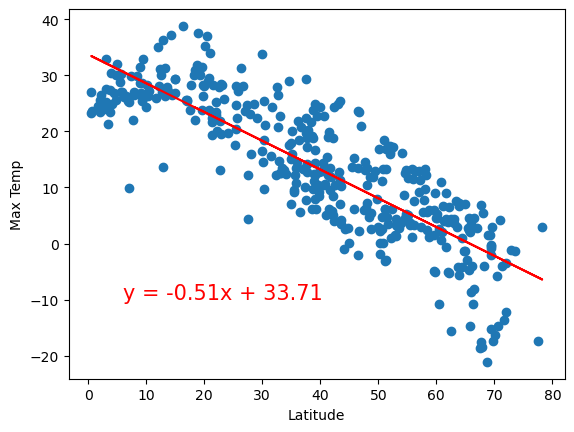

In [15]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.4121057168607245


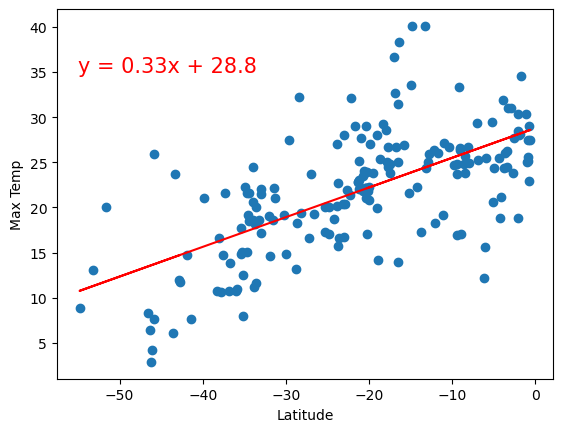

In [16]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.05689741545789598


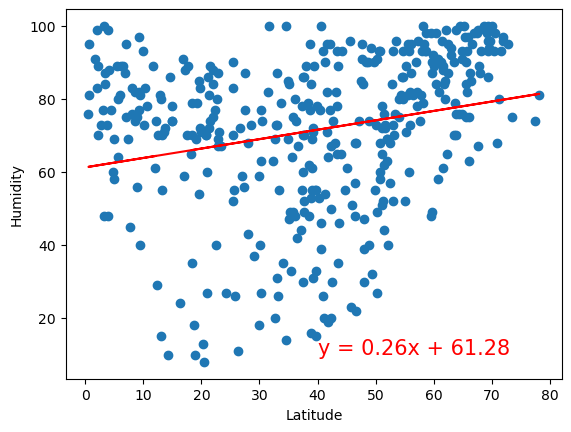

In [17]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.0002808747046324607


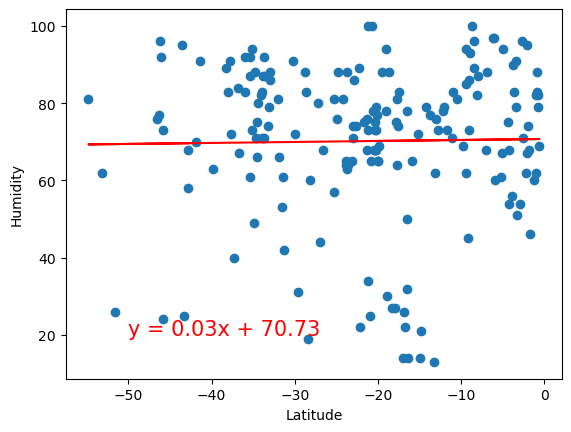

In [18]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.024026517125811015


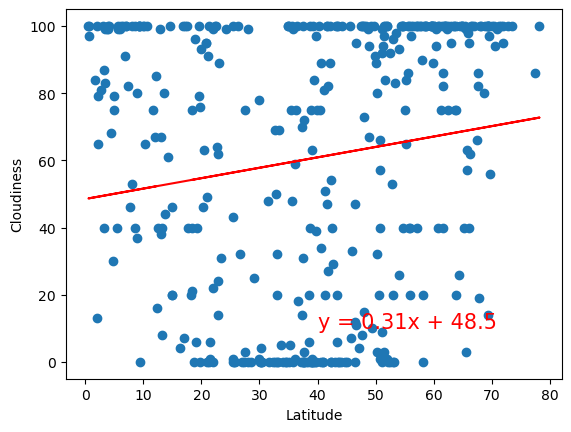

In [19]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.02056735429994368


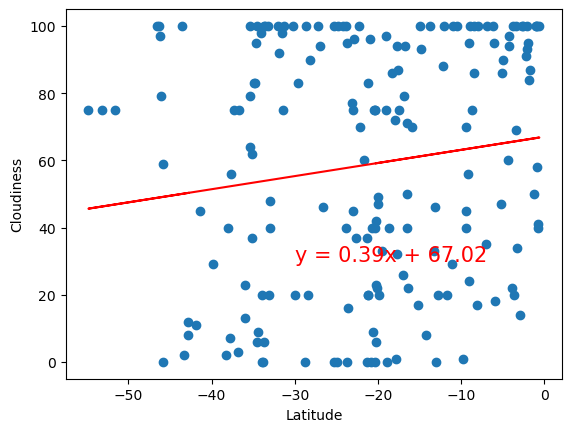

In [20]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.030396762354449467


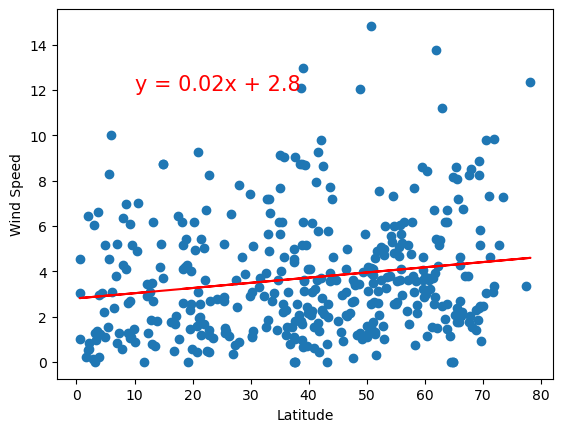

In [21]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.062239040700515696


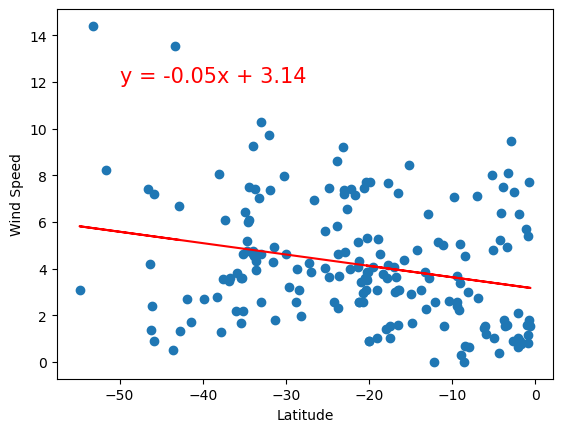

In [22]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE